## Zoning and Land Use Notebook
### Team Code & Cry

In [1]:
#importing libraries
import pandas as pd
import geopandas as gpd
import plotly.express as px

In [4]:
#loading the 2015 Zoning and Land Use map for San Francisco
df = gpd.read_file('data/SFZoningDistricts_Jan2015.geojson')

### Cleaning Up the Data

In [5]:
df.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9978 entries, 0 to 9977
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   zoning_sim  9978 non-null   object  
 1   districtna  9978 non-null   object  
 2   shape_area  9978 non-null   object  
 3   url         9909 non-null   object  
 4   multigeom   9978 non-null   object  
 5   shape_len   9978 non-null   object  
 6   geometry    9978 non-null   geometry
dtypes: geometry(1), object(6)
memory usage: 545.8+ KB


In [6]:
#Defining columns to keep (zoning district name, zoning use abbreviation, area, geometry)
columns_to_keep = ['districtna',
                   'zoning_sim',
                   'shape_area',
                   'geometry']

In [7]:
#Adding these columns to a new dataframe
df2 = df[columns_to_keep].copy()
df2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9978 entries, 0 to 9977
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   districtna  9978 non-null   object  
 1   zoning_sim  9978 non-null   object  
 2   shape_area  9978 non-null   object  
 3   geometry    9978 non-null   geometry
dtypes: geometry(1), object(3)
memory usage: 311.9+ KB


In [8]:
#Renaming the columns
df2.columns = ['ZoningDistrict',
                 'ZoningCode',
                 'Area',
                 'geometry']
df2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9978 entries, 0 to 9977
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ZoningDistrict  9978 non-null   object  
 1   ZoningCode      9978 non-null   object  
 2   Area            9978 non-null   object  
 3   geometry        9978 non-null   geometry
dtypes: geometry(1), object(3)
memory usage: 311.9+ KB


In [9]:
#Adding a 'use' column to group similar land uses togeher to streamline presentation in forthcoing maps
df2['use'] = ''

In [10]:
#Defining common names for the land uses that I want to map 
df2.loc[df2['ZoningCode'] == 'M-1', 'use'] = 'Industrial' #M-1, Light Industrial
df2.loc[df2['ZoningCode'] == 'M-2', 'use'] = 'Industrial' #M-2, Heavy Industrial
df2.loc[df2['ZoningCode'] == 'HP-RA', 'use'] = 'Hunters Point' #HP-RA, Huners Point Redevelopment District
df2.loc[df2['ZoningCode'] == 'PDR-1-B', 'use'] = 'Production, Distribution, Repair' #PDR-1-B is a Production, Distribution, and Repair industrial District
df2.loc[df2['ZoningCode'] == 'PDR-1-D', 'use'] = 'Production, Distribution, Repair' #PDR-1-D is a Production, Distribution, and Repair industrial District
df2.loc[df2['ZoningCode'] == 'PDR-1-G', 'use'] = 'Production, Distribution, Repair' #PDR-1-G is a Production, Distribution, and Repair industrial District
df2.loc[df2['ZoningCode'] == 'PDR-2', 'use'] = 'Production, Distribution, Repair' #PDR-2 is a Production, Distribution, and Repair industrial District
df2.loc[df2['ZoningCode'] == 'P', 'use'] = 'Public' #P is Public land use

df2.head()

,ZoningDistrict,ZoningCode,Area,geometry,use
0,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,13901.1426915,"POLYGON ((-122.39202 37.73010, -122.39207 37.7...",
1,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,11413.2653614,"POLYGON ((-122.39165 37.73087, -122.39172 37.7...",
2,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,14482.4919657,"POLYGON ((-122.39134 37.73169, -122.39144 37.7...",
3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,54869.3000022,"POLYGON ((-122.39187 37.73195, -122.39190 37.7...",
4,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,12643.7618017,"POLYGON ((-122.39103 37.73262, -122.39113 37.7...",


In [11]:
# Filling the rest of the land uses as 'Other' to group them and grey them out in the map
df2['use'].fillna(value='Other', inplace=True)
df2.head()

,ZoningDistrict,ZoningCode,Area,geometry,use
0,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,13901.1426915,"POLYGON ((-122.39202 37.73010, -122.39207 37.7...",
1,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,11413.2653614,"POLYGON ((-122.39165 37.73087, -122.39172 37.7...",
2,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,14482.4919657,"POLYGON ((-122.39134 37.73169, -122.39144 37.7...",
3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,54869.3000022,"POLYGON ((-122.39187 37.73195, -122.39190 37.7...",
4,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,12643.7618017,"POLYGON ((-122.39103 37.73262, -122.39113 37.7...",


In [12]:
#Creating a color dictionary to color code the map by land use
color_dict = {'Industrial' : 'purple',
              'Hunters Point' : 'red',
              'Production, Distribution, Repair' : 'orange',
              'Public' : 'darkgrey',
              '' : 'lightgrey'}

df2['Colors'] = df2['use'].map(color_dict)
df2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9978 entries, 0 to 9977
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ZoningDistrict  9978 non-null   object  
 1   ZoningCode      9978 non-null   object  
 2   Area            9978 non-null   object  
 3   geometry        9978 non-null   geometry
 4   use             9978 non-null   object  
 5   Colors          9978 non-null   object  
dtypes: geometry(1), object(5)
memory usage: 467.8+ KB


In [114]:
Area = int(Area)

NameError: name 'Area' is not defined

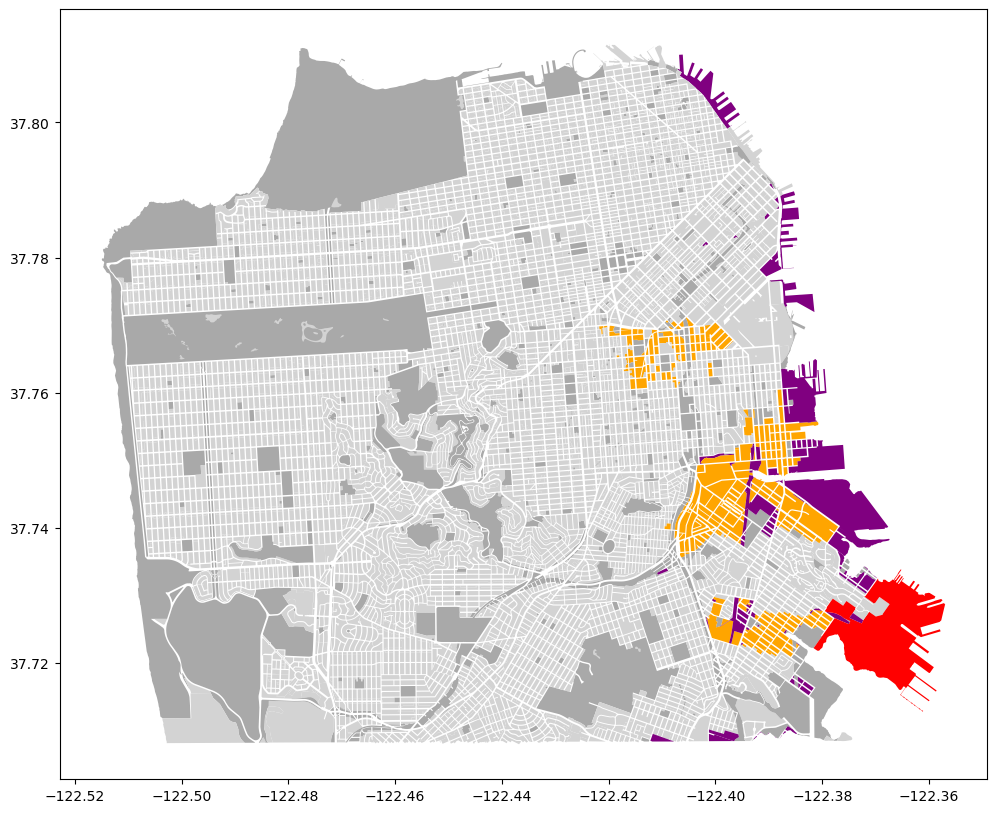

In [32]:
ax = df2.plot(color = df2['Colors'],
             figsize=(12,10))

<AxesSubplot: >

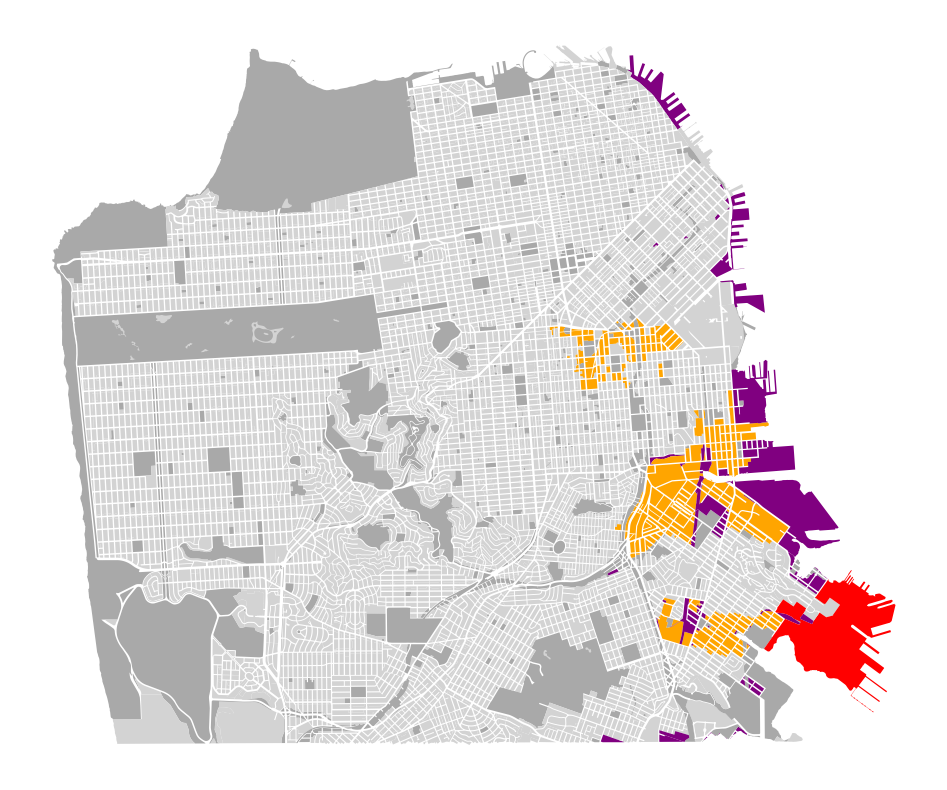

In [14]:
#Cleaning up and formatting the map
ax = df2.plot(color = df2['Colors'],
              figsize=(12,10),
              legend = True,
              legend_kwds={
                  'loc' : 'upper right',
                  'bbox_to_anchor' : (1,1)
              }
             )
ax.axis('off')
ax

In [112]:
#Making some charts to summarize the total area by land use in SF
df2.plot.bar(x='ZoningCode',
             y='Area')

TypeError: no numeric data to plot

## Streets

In [15]:
#loading the street map of San Francisco to map the locations of freeways
sts = gpd.read_file('data/SF_StreetsActiveRetired.geojson')

In [17]:
#inspecting the shape and overall information in the treets file
sts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16996 entries, 0 to 16995
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   jurisdiction        13419 non-null  object        
 1   zip_code            16985 non-null  object        
 2   f_node_cnn          16233 non-null  object        
 3   date_dropped        763 non-null    datetime64[ns]
 4   gds_chg_id_add      1168 non-null   object        
 5   classcode           16233 non-null  object        
 6   t_st                16994 non-null  object        
 7   accepted            16994 non-null  object        
 8   street_gc           16233 non-null  object        
 9   cnn                 16996 non-null  object        
 10  layer               16996 non-null  object        
 11  nhood               16232 non-null  object        
 12  st_type             15841 non-null  object        
 13  streetname          16996 non-null  ob

In [39]:
#defining the columns to keep as a new dataframe
streets_to_keep = ['cnn',
                   'layer',
                   'st_type',
                   'streetname',
                   'street',
                   'geometry']

sts2 = sts[streets_to_keep].copy()
sts2
                   

,cnn,layer,st_type,streetname,street,geometry
0,15145000,PRIVATE,CT,CROWN CT,CROWN,"LINESTRING (-122.44694 37.75723, -122.44664 37..."
1,11305001,UPROW,AVE,SAINT GERMAIN AVE,SAINT GERMAIN,"LINESTRING (-122.44792 37.75759, -122.44888 37..."
2,11305002,STREETS,AVE,SAINT GERMAIN AVE,SAINT GERMAIN,"LINESTRING (-122.44888 37.75754, -122.45029 37..."
3,13798000,STREETS,ST,CORONA ST,CORONA,"LINESTRING (-122.46660 37.72592, -122.46654 37..."
4,13576001,STREETS,None,WEST POINT RD,WEST POINT,"LINESTRING (-122.38099 37.73596, -122.38064 37..."
...,...,...,...,...,...,...
16991,15212000,STREETS,AVE,FAIRFAX AVE,FAIRFAX,"LINESTRING (-122.37941 37.73524, -122.37953 37..."
16992,15213000,STREETS,AVE,FAIRFAX AVE,FAIRFAX,"LINESTRING (-122.38013 37.73528, -122.38028 37..."
16993,15214000,STREETS,WAY,IRONWOOD WAY,IRONWOOD,"LINESTRING (-122.38013 37.73499, -122.38013 37..."
16994,15215000,STREETS,WAY,IRONWOOD WAY,IRONWOOD,"LINESTRING (-122.38013 37.73528, -122.38011 37..."


In [40]:
#Renaming these columns
sts2.columns = ['cnn',
                'Layer',
                'Type',
                'Name',
                'Street',
                'geometry']

In [41]:
sts2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16996 entries, 0 to 16995
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   cnn       16996 non-null  object  
 1   Layer     16996 non-null  object  
 2   Type      15841 non-null  object  
 3   Name      16996 non-null  object  
 4   Street    16996 non-null  object  
 5   geometry  16996 non-null  geometry
dtypes: geometry(1), object(5)
memory usage: 796.8+ KB


In [69]:
#Inserting a new 'Use' column to the dataframe to try and merge this dataset with the zoning and land use data
sts2['use'] = ''

In [70]:
sts2.head()

,cnn,Layer,Type,Name,Street,geometry,use
0,15145000,PRIVATE,CT,CROWN CT,CROWN,"LINESTRING (-122.44694 37.75723, -122.44664 37...",
1,11305001,UPROW,AVE,SAINT GERMAIN AVE,SAINT GERMAIN,"LINESTRING (-122.44792 37.75759, -122.44888 37...",
2,11305002,STREETS,AVE,SAINT GERMAIN AVE,SAINT GERMAIN,"LINESTRING (-122.44888 37.75754, -122.45029 37...",
3,13798000,STREETS,ST,CORONA ST,CORONA,"LINESTRING (-122.46660 37.72592, -122.46654 37...",
4,13576001,STREETS,FWY,WEST POINT RD,WEST POINT,"LINESTRING (-122.38099 37.73596, -122.38064 37...",


In [108]:
#Running a query on the column 'Layer' to focus in on freeways specifically in San Francisco

sts2.loc[sts2['Layer'] == 'FREEWAYS', 'use'] = 'freeway'
sts2.loc[sts2['Type'] == 'HWY', 'use'] = 'freeway'
sts2.loc[sts2['Name'] == '19TH AVE', 'use'] = 'freeway'
sts2.loc[sts2['Name'] == 'PARK PRESIDIO BLVD', 'use'] = 'freeway'
sts2.loc[sts2['Name'] == 'VAN NESS AVE', 'use'] = 'freeway'
sts2.loc[sts2['Name'] == 'SLOAT BLVD', 'use'] = 'freeway'
sts2.loc[sts2['Name'] == 'SKYLINE BLVD', 'use'] = 'freeway'
sts2.loc[sts2['Name'] == 'LOMBARD ST', 'use'] = 'freeway'
sts2.loc[sts2['Name'] == 'RICHARDSON AVE', 'use'] = 'freeway'

In [109]:
#saving this as a new dataframe
hwys = sts2[sts2['use']=='freeway']

In [110]:
hwys.sample(20)

,cnn,Layer,Type,Name,Street,geometry,use
2775,13151202,STREETS,AVE,VAN NESS AVE,VAN NESS,"LINESTRING (-122.42102 37.78430, -122.42110 37...",freeway
1494,19204000,FREEWAYS,FWY,HWY 101 NORTHBOUND,HWY 101 NORTHBOUND,"LINESTRING (-122.41634 37.76969, -122.41787 37...",freeway
5942,10270201,STREETS,BLVD,PARK PRESIDIO BLVD,PARK PRESIDIO,"LINESTRING (-122.47204 37.77687, -122.47210 37...",freeway
7941,8520000,STREETS,HWY,GREAT HWY,GREAT,"LINESTRING (-122.50687 37.74167, -122.50693 37...",freeway
4125,11956103,STREETS,BLVD,SLOAT BLVD,SLOAT,"LINESTRING (-122.48729 37.73412, -122.48817 37...",freeway
1328,19364000,FREEWAYS,FWY,I-80 EASTBOUND,I-80 EASTBOUND,"LINESTRING (-122.39179 37.78540, -122.39104 37...",freeway
2752,13144101,STREETS,AVE,VAN NESS AVE,VAN NESS,"LINESTRING (-122.41951 37.77637, -122.41960 37...",freeway
10303,6432201,STREETS,HWY,GREAT HWY,GREAT,"LINESTRING (-122.51129 37.77508, -122.51134 37...",freeway
1433,19226000,FREEWAYS,RAMP,HWY 101 S OFF RAMP,HWY 101 S OFF,"LINESTRING (-122.40390 37.74980, -122.40407 37...",freeway
8030,8443000,STREETS,ST,LOMBARD ST,LOMBARD,"LINESTRING (-122.41362 37.80276, -122.41372 37...",freeway


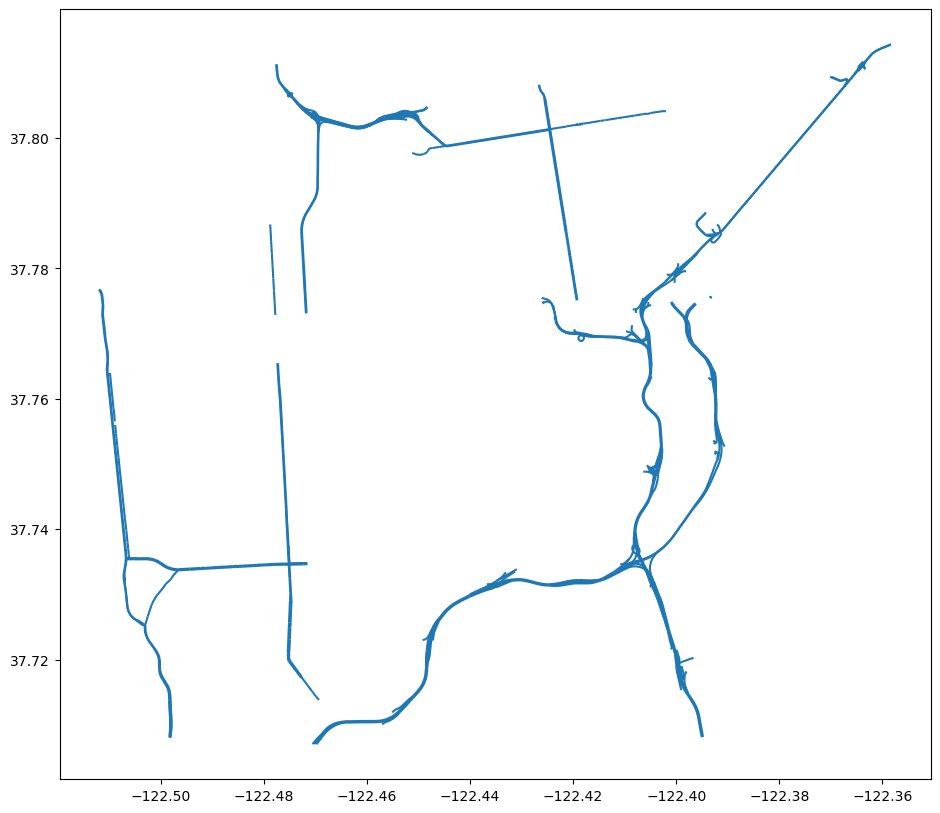

In [111]:
#mapping the location of only freeways in the city, which will show Highway 101, 280, 80, and Highway 1
ax3 = hwys.plot(figsize=(12,10))

## Merging/Joining the Data

In [85]:
import matplotlib.pyplot as plt

<AxesSubplot: >

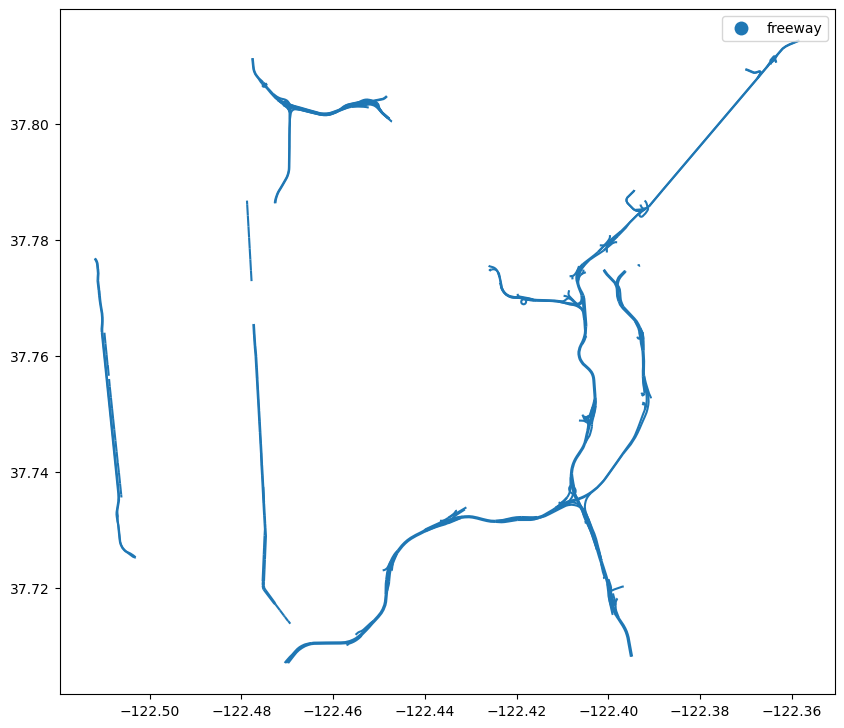

In [86]:
hwys.plot(figsize=(10,10),
         column='use',
         cmap='tab20',
         legend=True)

In [75]:
frw = gpd.read_file('data/SF_Highways.geojson')

<AxesSubplot: >

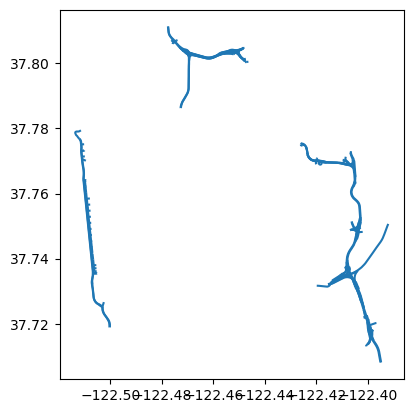

In [76]:
frw.plot()

In [77]:
nt = gpd.read_file('data/19thAve.geojson')

<AxesSubplot: >

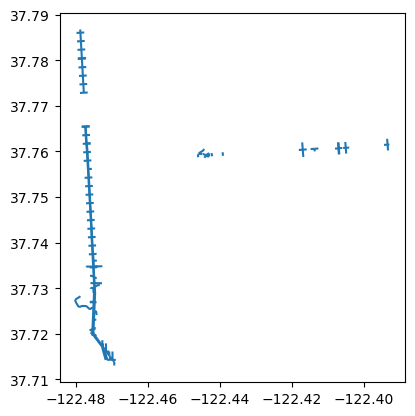

In [78]:
nt.plot()